In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test3 import Test
from bitalg.visualizer.main import Visualizer
from copy import deepcopy

# Triangulacja wielokątów monotonicznych - problem monitorowania galerii


## Przydatne funkcje


In [8]:
polygon_example_1 = [(5,5), (3,4), (6,3), (4,2), (6,0), (7,1), (8,4)]
polygon_example_2 = [(4, 1), (2, 2), (3, 5), (4, 7), (6, 6), (3, 9), (6, 8), (9, 10), (7, 4), (4, 3), (5, 0)]
polygon_example_colors = [4,4,4,4,3,0,2,0,4,4,1]
polygon_example_tri = [(polygon_example_1[0], polygon_example_1[2]),
                      (polygon_example_1[2], polygon_example_1[5]),
                      (polygon_example_1[2], polygon_example_1[6]),
                      (polygon_example_1[6], polygon_example_1[3]),
                      (polygon_example_1[2], polygon_example_1[4]),]
       

In [9]:
def draw_polygon(polygon):
    vis = Visualizer()
    points = polygon
    vis.add_polygon(polygon, fill=False)
    vis.show()


In [10]:
def draw_polygon_colors(polygon,colors):
    points_start=[]
    points_end=[]
    points_connect=[]
    points_divide=[]
    points_regular=[]
    for i in range(len(polygon)):
        if colors[i]==0:
            points_start.append(polygon[i])
        elif colors[i]==1:
            points_end.append(polygon[i])
        elif colors[i]==2:
            points_connect.append(polygon[i])
        elif colors[i]==3:
            points_divide.append(polygon[i])
        elif colors[i]==4:
            points_regular.append(polygon[i])

    vis = Visualizer()
    colors_start = ['green']
    color_end=['red']
    color_connect=['blue']
    color_divide=['cyan']
    color_regular=['#3B240B']
    vis.add_polygon(polygon, fill=False)
    vis.add_point(points_start, color=colors_start)
    vis.add_point(points_end, color=color_end)
    vis.add_point(points_connect, color=color_connect)
    vis.add_point(points_divide, color=color_divide)
    vis.add_point(points_regular, color=color_regular)
    vis.show()


In [11]:
def draw_polygon_tri(polygon,tri):

    vis = Visualizer()
    points = polygon
    tri_line_segments = tri
    vis.add_polygon(points, fill=False)
    vis.add_point(points)
    vis.add_line_segment(tri_line_segments, color='red')
    vis.show()


## Wprowadzenie
Celem ćwiczenia jest:
- sprawdzanie $y$-monotoniczności
- podział wierchołków na kategorie
- triangulacja wielokąta monotonicznego

### Przykładowy wielokąt $y$-monotoniczny

In [12]:
draw_polygon(polygon_example_1)

Do tego celu wygeneruj wielokąt.

In [13]:
polygon = [(0,0),(0.5,0.2),(1,0.1),(1,1),(0.6,1.5),(0.8,0.8),(0.3,1.0),(0.3,0.5)]

## Czy wielokąt jest $y$-monotoniczny?

Wielokąt jest monotoniczny, gdy jego wierzchołki mogą być ułożone w taki sposób, że jedna z jego współrzędnych (na przykład współrzędna $x$ lub $y$, w zależności od układu współrzędnych) zawsze rośnie lub maleje wzdłuż kolejnych wierzchołków. Innymi słowy, dla każdej pary wierzchołków wielokąta (oprócz wierzchołka startowego i końcowego), jeden z punktów ma większą (lub mniejszą) wartość danej współrzędnej niż drugi punkt.

W praktyce, wielokąt monotoniczny może być łatwiej sortowany lub przetwarzany w pewnych algorytmach geometrycznych, ponieważ istnieje pewna kolejność, w jakiej wierzchołki pojawiają się wzdłuż danej osi (np. osi $x$ lub $y$). Monotoniczność może ułatwić znajdowanie przecięć linii w takim wielokącie lub wykonywanie innych operacji geometrycznych. W tym zadaniu interesuje nas monotoniczność wielokąta wzdłuż osi $y$.

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```is_y_monotonic```. Pamiętaj, aby sprawozdanie zawierało krótki opis działania tej funkcji.

In [14]:

def det(a,b,c):
    return a[0]*b[1] + a[1]*c[0] + b[0]*c[1] - b[1]*c[0] - a[1]*b[0] - a[0]*c[1]
def orient(a,b,c,eps=0):
    val = det(a,b,c)
    if abs(val)<=eps:    
        return 0
    elif val>0:
        return 1
    else:
        return -1

In [18]:
def chain_generator(polygon):
    lowest_point = min(polygon,key = lambda y: y[1])
    highest_point = max(polygon,key = lambda y: y[1])
    i_max = polygon.index(highest_point)
    i_min = polygon.index(lowest_point)
    left_chain = []
    right_chain = []
    for i in range(len(polygon)):
        j = (i_max+i)%len(polygon)
        left_chain.append(polygon[j])
        if j == i_min:
            break
    for i in range(len(polygon)):
        j = (i_min+i)%len(polygon)
        right_chain.append(polygon[j])
        if j == i_max:
            break
    right_chain.reverse()
    if orient(right_chain[1],right_chain[0],left_chain[1]):
        left_chain, right_chain = right_chain, left_chain
    return left_chain,right_chain

In [22]:
def is_y_monotonic(polygon):
    """
    Funkcja określa czy podana figura jest y-monotoniczna.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: wartość bool - true, jeśli wielokąt jest monotoniczny i false jeśli nie jest
    """
    left_chain, right_chain = chain_generator(polygon)
    for i,point in enumerate(left_chain):
        if i == 0:
            continue
        if point[1] > left_chain[i-1][1]:
            return False
    for i, point in enumerate(right_chain):
        if i == 0:
            continue
        if point[1] > right_chain[i-1][1]:
            return False
    return True
    raise Exception("Unimplemented")

Przeprowadź test poprawności powyższej funkcji.

In [24]:
Test().runtest(1, is_y_monotonic)

Lab 3, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.001s


Sprawdź monotoniczność swojego wielokątu.

In [107]:
print(is_y_monotonic(polygon))

False


***

# Podział wierzchołków na kategorie

Wierzchołki naszego wielokąta możemy podzielić na parę kategorii:
- początkowe, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których wielokąt zaczyna się monotoniczny spadek 
- końcowe, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których monotoniczność wielokąta się zmienia, czyli na przykład zaczyna się monotoniczny wzrost, jeśli wcześniej był spadek, lub na odwrót.

Wierzchołki startowe i końcowe są ważne w kontekście algorytmów przetwarzania wielokątów monotonicznych, takich jak algorytmy dziel i zwyciężaj oraz triangulacji. 
- dzielący, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które wyznaczają przekątne (linie łączące), tworzące trójkąty podczas triangulacji.
- łączący, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które są połączone liniami (przekątnymi) wewnątrz wielokąta, tworząc trójkąty.

Wierzchołki łączące i dzielące odgrywają kluczową rolę w procesie triangulacji wielokątów, pozwalając na podział figury na trójkąty w sposób bezkolizyjny. 
- prawdiłowy, pozostałe przypadki, jeden sąsiad powyżej drugi poniżej


### Przykładowy wielokąt z pokolorowanymi wierzchołkami.

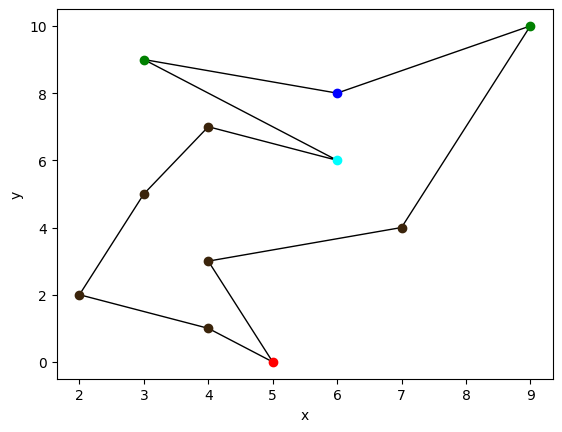

In [108]:
draw_polygon_colors(polygon_example_2,polygon_example_colors)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```color_vertex``` .

In [25]:
def color_vertex(polygon):
    """

    Funkcja dzieli wierzchołki na kategorie i przypisuje wierzchołkom odpowiednie numery: 0 - początkowy, 1 - końcowy, 2 - łączący, 3 - dzielący, 4 - prawdiłowy
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica o długości n, gdzie n = len(polygon), zawierająca cyfry z przedziału 0 - 4, gdzie T[i] odpowiada kategorii i-tego wierzchołka.
    """
    colors = []
    n = len(polygon)
    for i in range(n):
        if polygon[i-1][1] < polygon[i][1] and polygon[(i+1)%n][1] < polygon[i][1]:
            if orient(polygon[i-1],polygon[i],polygon[(i+1)%n]) == 1:
                color = 0
            else:
                color = 3
        elif polygon[i-1][1] > polygon[i][1] and polygon[(i+1)%n][1] > polygon[i][1]:
            if orient(polygon[i-1],polygon[i],polygon[(i+1)%n]) == 1:
                color = 1
            else:
                color = 2
        else:
            color = 4
        colors.append(color)
    draw_polygon_colors(polygon,colors)
    return colors
    raise Exception("Unimplemented")

Przeprowadź test poprawności powyższej funkcji. 

Lab 3, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: 

Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.980s


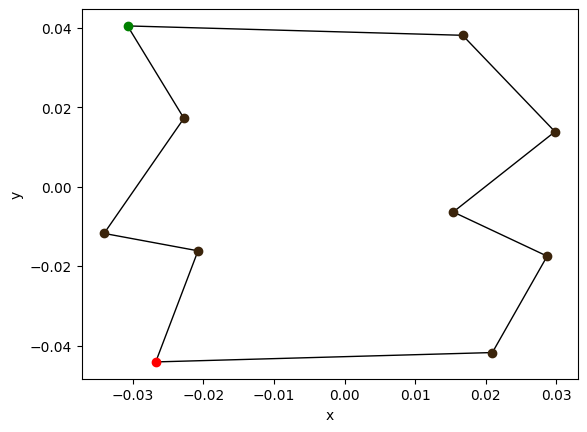

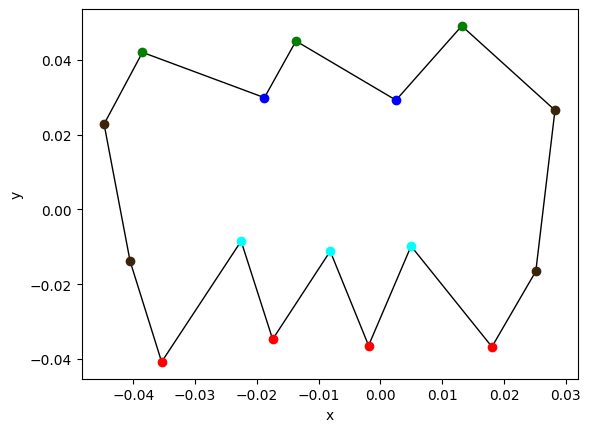

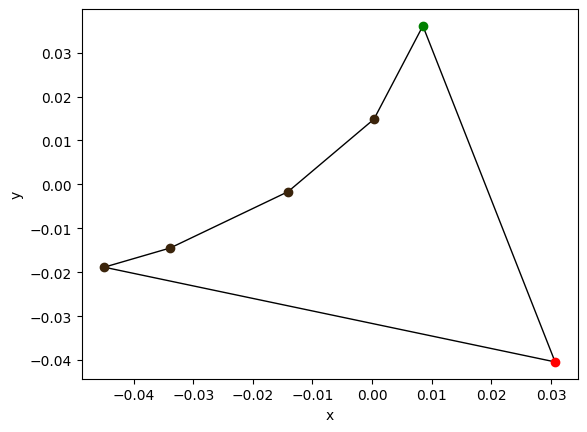

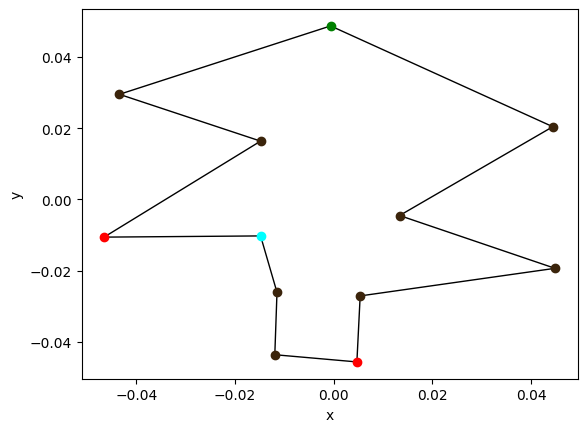

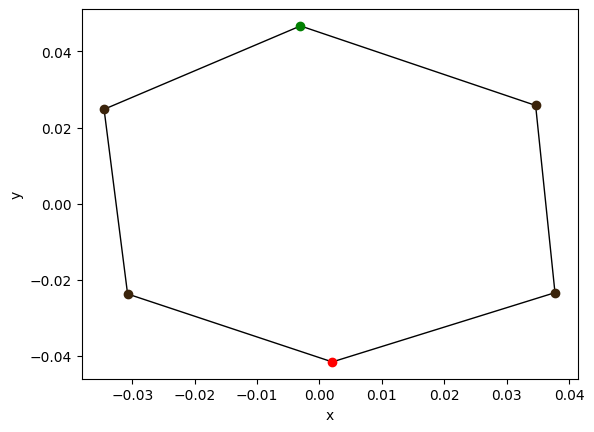

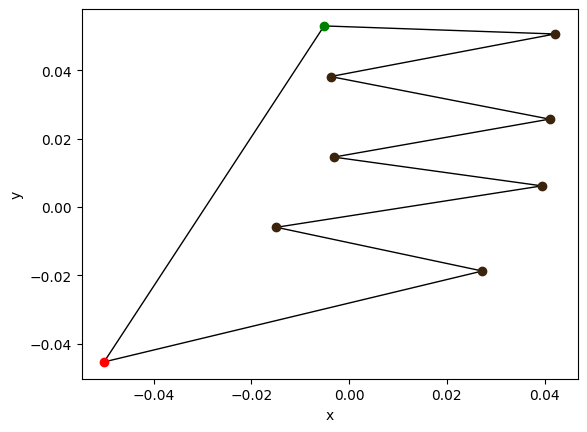

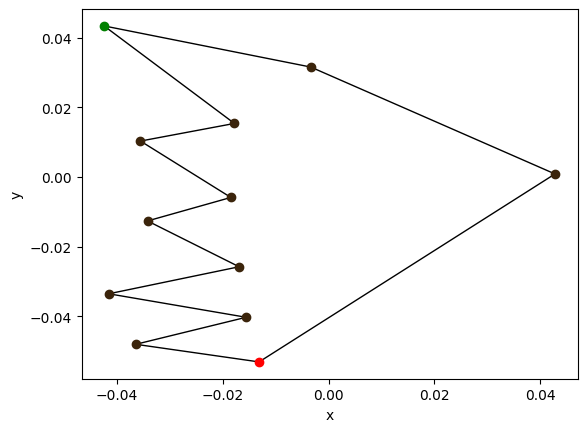

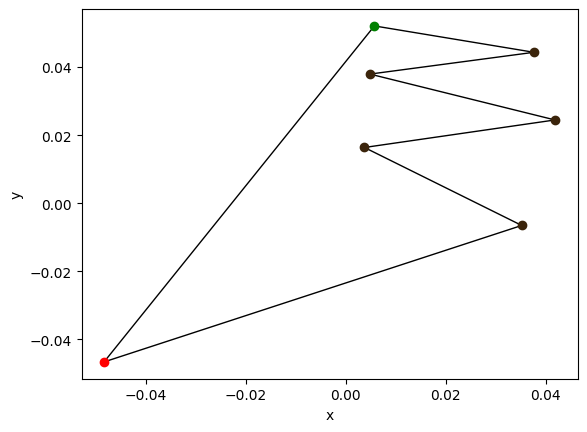

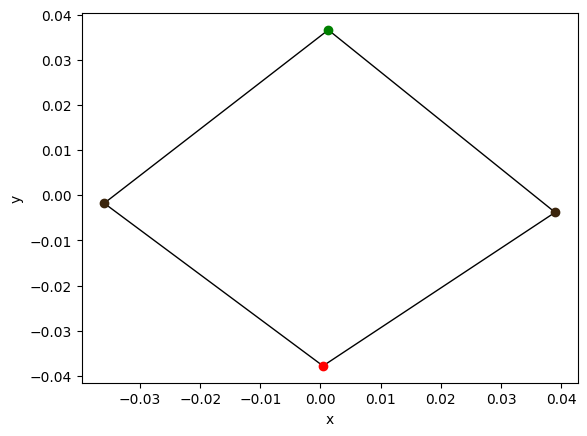

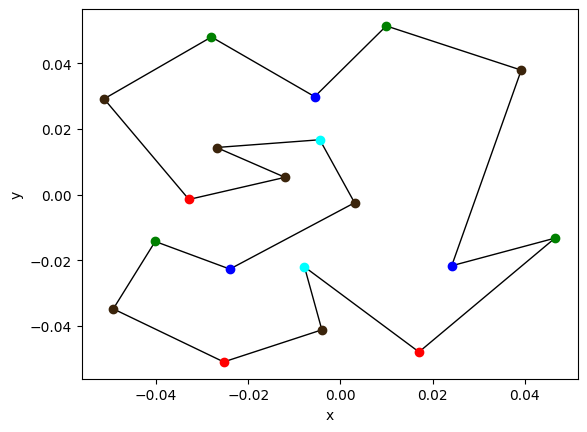

In [110]:
Test().runtest(2, color_vertex)

Zwizualizuj swój wielokąt z pokolorowanymi według kategorii wierzchołkami.

***

# Triangulacja wielokąta monotonicznego

Triangulacja wielokąta monotonicznego to proces podziału wielokąta monotonicznego na trójkąty poprzez dodawanie przekątnych (linii łączących wierzchołki), które nie przecinają się wewnętrznie.

### Przykładowy wielokąt podzielony na trójkąty.

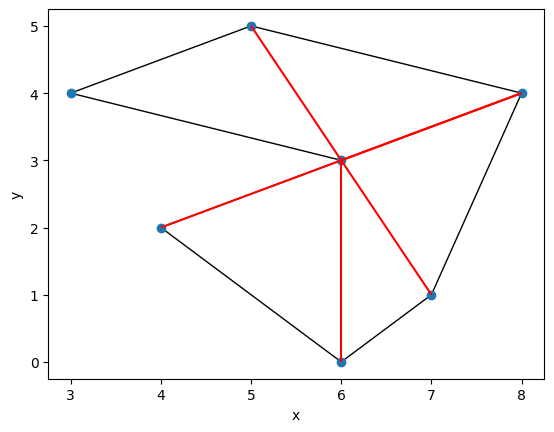

In [112]:
draw_polygon_tri(polygon_example_1,polygon_example_tri)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```triangulation```. Wykorzystaj algorytm opisany na wykładzie.

In [113]:
def triangulation_test(polygon):
    """
    Funkcja dokonuje triangulacji wielokąta monotonicznego. 
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki 1-5 i 2-3
    """
    def same_chain(a,b):
        return (a in left_chain and b in left_chain) or (a in right_chain and b in right_chain)
    def inside(a,b,c):
        if (c in left_chain and b in left_chain):
            return orient(a,b,c)==1
        else:
            return orient(a,b,c)==-1
    p = deepcopy(polygon)
    p = sorted(p,key= lambda y: y[1], reverse=True)
    n = len(p)
    left_chain, right_chain = chain_generator(polygon)
    left_chain.sort(key=lambda y: y[1])
    right_chain.sort(key=lambda y: y[1])


    segments=set()
    for i in range(n):
        segments.add((polygon[i-1],polygon[i]))
        
    s = []
    s.append(p[0])
    s.append(p[1])

    ind = dict()
    for i in range(n):
        ind[polygon[i]] = i

    tri = []

    for i in range(2,n):
        if not same_chain(s[-1],p[i]):
            while s:
                u = s.pop()
                if (u,p[i]) not in segments and (p[i],u) not in segments:
                    tri.append((ind[u],ind[p[i]]))
            s.append(p[i-1])
            s.append(p[i])
        else:
            while len(s) > 1 and inside(s[-1],s[-2],p[i]):
                if (s[-2],p[i]) not in segments and (p[i],s[-2]) not in segments:
                    tri.append((ind[s[-2]],ind[p[i]]))
                last = s.pop()
            s.append(p[i])
    # print(polygon)
    # draw_polygon(polygon)
    return tri

    

Jakich struktur można użyć do przechowywania wielokątu, oraz utworzonej triangulacji? Uzasadnij wybór struktury w swoim algorytmie

ODPOWIEDŹ: 

Przeprowadź testy poprawności powyższej funkcji.


In [144]:
Test().runtest(3, triangulation_test)

Lab 3, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: WRONG ANSWER
		Output:   [(5, 3), (3, 6), (6, 2), (1, 7), (2, 7), (7, 0), (0, 8)]
		Expected: [[3, 5], [3, 6], [2, 6], [1, 6], [7, 1], [0, 7], [8, 0]]
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 9/10
Time: 0.013s


In [5]:
def triangulation(polygon):
    """
    Funkcja dokonuje triangulacji wielokąta monotonicznego. 
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki 1-5 i 2-3
    """
    def same_chain(a,b):
        return (a in left_chain and b in left_chain) or (a in right_chain and b in right_chain)
    def inside(a,b,c):
        if (c in left_chain and b in left_chain):
            return orient(a,b,c)==1
        else:
            return orient(a,b,c)==-1
    p = deepcopy(polygon)
    p = sorted(p,key= lambda y: y[1], reverse=True)
    n = len(p)
    left_chain, right_chain = chain_generator(polygon)
    left_chain.sort(key=lambda y: y[1])
    right_chain.sort(key=lambda y: y[1])


    segments=set()
    for i in range(n):
        segments.add((polygon[i-1],polygon[i]))
        
    s = []
    s.append(p[0])
    s.append(p[1])

    tri = []

    for i in range(2,n):
        if not same_chain(s[-1],p[i]):
            while s:
                u = s.pop()
                if (u,p[i]) not in segments and (p[i],u) not in segments:
                    tri.append((u,p[i]))
            s.append(p[i-1])
            s.append(p[i])
        else:
            while len(s) > 1 and inside(s[-1],s[-2],p[i]):
                if (s[-2],p[i]) not in segments and (p[i],s[-2]) not in segments:
                    tri.append((s[-2],p[i]))
                last = s.pop()
            s.append(p[i])
    # print(polygon)
    # draw_polygon(polygon)
    return tri

    

In [164]:
def triangulation_vis(polygon):
    """
    Funkcja dokonuje triangulacji wielokąta monotonicznego. 
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki 1-5 i 2-3
    """
    def same_chain(a,b):
        return (a in left_chain and b in left_chain) or (a in right_chain and b in right_chain)
    def inside(a,b,c):
        if (c in left_chain and b in left_chain):
            return orient(a,b,c)==1
        else:
            return orient(a,b,c)==-1
    p = deepcopy(polygon)
    p = sorted(p,key= lambda y: y[1], reverse=True)
    n = len(p)
    left_chain, right_chain = chain_generator(polygon)
    left_chain.sort(key=lambda y: y[1])
    right_chain.sort(key=lambda y: y[1])


    segments=set()
    for i in range(n):
        segments.add((polygon[i-1],polygon[i]))
        
    s = []
    s.append(p[0])
    s.append(p[1])

    ind = dict()
    for i in range(n):
        ind[polygon[i]] = i

    tri = []

    for i in range(2,n):
        if not same_chain(s[-1],p[i]):
            while s:
                u = s.pop()
                if (u,p[i]) not in segments and (p[i],u) not in segments:
                    tri.append((u,p[i]))
                    draw_polygon_tri(polygon,tri)
            s.append(p[i-1])
            s.append(p[i])
        else:
            while len(s) > 1 and inside(s[-1],s[-2],p[i]):
                if (s[-2],p[i]) not in segments and (p[i],s[-2]) not in segments:
                    tri.append((s[-2],p[i]))
                    draw_polygon_tri(polygon,tri)
                last = s.pop()
            s.append(p[i])
    return tri

    

Zwizualizuj powstały wielokąt podzielony na trójkąty.

In [3]:
tri = triangulation(polygon_example_1)
draw_polygon_tri(polygon_example_1,tri)
test_cases = [[(0.030693547033494514, -0.0404187105216232), (0.008516127678655797, 0.0360825149685729), (0.0003104825173654846, 0.014850897321514067), (-0.01410484006327968, -0.0016625830706427924), (-0.03384274328908614, -0.01446895561966241), (-0.04493145296650549, -0.0188500830706428)], [(-0.0011310497406990389, 0.05034364616169651), (-0.03018346909553775, 0.03686325400483377), (-0.042159275547150654, 0.0038362932205200373), (-0.02641330780521517, -0.029190667563793703), (0.0006431438076880541, -0.046041157759872144), (0.027477821227042898, -0.029527677367715277), (0.03235685348510742, 0.001140214789147484), (0.028586692194784838, 0.02911202851463769)], [(0.002417337356075161, 0.04811376394010061), (-0.006453630385860332, 0.03126327374402216), (-0.024417340063279683, 0.021152979626375107), (-0.006675404579408711, 0.009020626685198624), (-0.034175404579408715, -0.0024377066481347104), (-0.006231856192311938, -0.013559030177546477), (-0.045929436837473234, -0.029735500765781776), (-0.006453630385860332, -0.036138687040291585), (-0.004679436837473225, -0.04422692233440923), (-2.2178772957098802e-05, -0.0499560890010759), (0.0037479825173654807, -0.04523795174617394), (0.004856853485107421, -0.03479064782460531), (0.04322378896897838, -0.026365402726566088), (0.0050786276786558004, -0.012548000765781775), (0.02548185348510741, -0.0010896674324484407), (0.005522176065752574, 0.010368665900884907), (0.01616733735607516, 0.02317503844990451), (0.0050786276786558004, 0.034633371783237846)], [(0.03877999059615596, -0.025073528383292402), (0.011501764789704341, -0.007212008775449252), (0.038336442209059185, 0.0062683833814135), (0.015493700273575314, 0.013008579459844863), (0.04121950672518822, 0.027500001028472332), (0.011501764789704341, 0.050416667695139), (-0.039506299726424686, 0.007279412793178203), (-0.022873235210295655, -0.009908087206821806), (-0.04527242875868275, -0.03080269504995907), (-0.00047404166190855024, -0.041924018579370836)], [(-0.003046627044677744, 0.04670955985200173), (-0.034538562528548714, 0.02480392259709978), (-0.030768401238226127, -0.023725489167606126), (0.0020541794069351693, -0.04158700877544927), (0.03775982456822549, -0.02338847936368456), (0.034654985858548065, 0.02581495200886448)], [(0.027247732531639826, -0.0187377430410946), (-0.014889364242553715, -0.005931370492074997), (0.039445313176801125, 0.006200982449101486), (-0.0031353319844892036, 0.0146262275471407), (0.04099773253163984, 0.025747551076552466), (-0.0038006545651343565, 0.03821691382165052), (0.042106603499381764, 0.05068627656674857), (-0.00513129972642469, 0.05304534519419954), (-0.050151461016747265, -0.04536151755089854)], [(0.04277192608002693, 0.0008762265186683937), (-0.0033571061780375833, 0.031544118675531155), (-0.04238936424255372, 0.043339461812786056), (-0.01777242875868275, 0.015367648087295849), (-0.03551436424255372, 0.010312501028472323), (-0.018437751339327915, -0.005863969559762983), (-0.0341837190812634, -0.012604165638194359), (-0.016885331984489202, -0.025747547991135537), (-0.04150226746836017, -0.033498773481331616), (-0.015554686823198882, -0.04023896955976299), (-0.036401461016747266, -0.04799019504995907), (-0.013115170694166622, -0.0530453421087826)], [(0.03523160349938177, -0.0065379891676061175), (0.0037396680155108025, 0.01637867749906055), (0.041884829305833385, 0.02446691279317821), (0.004848538983252729, 0.03794730495004095), (0.03767111962841403, 0.04435049122455076), (0.005735635757446289, 0.05210171671474684), (-0.04837726746836017, -0.0466421558342728)], [(0.00041305511228499625, -0.0378125), (0.03900176478970435, -0.0037745098039215635), (0.0013001518864785427, 0.036666666666666695), (-0.03595791262965049, -0.001752450980392145)], [(0.04277192608002693, -0.032150734265645346), (-0.01710710617803759, 0.049742648087295865), (-0.015332912629650496, 0.03761029514611938), (-0.017994202952231135, 0.020759804950040955), (-0.022873235210295655, 0.010312501028472323), (-0.0306353319844892, 0.004246324557884082), (-0.04083694488771501, 0.002561275538276231), (-0.04926436424255372, 0.0015502461265115286), (0.015050151886478541, -0.04158700877544927)]]
print(len(test_cases))
for p in test_cases:
    if is_y_monotonic(p):
        draw_polygon_tri(p,triangulation(p))
        


10


In [8]:
from scipy.spatial import Delaunay
for i,case in enumerate(test_cases):
    with open('test' + str(i + 3) + 'points','w') as plik:
        for p in case:
            plik.write(f"{p[0]} {p[1]}\n")
for i, case in enumerate(test_cases):
        with open(f'test{i + 3}triangles', 'w') as plik:
            tri = Delaunay(case)
            tr_ind = tri.simplices

            for tr in tr_ind:
                punkty = tri.points[tr]
                # Sprawdzenie orientacji trójkąta
                orientacja = (punkty[1][0] - punkty[0][0]) * (punkty[2][1] - punkty[0][1]) - (punkty[2][0] - punkty[0][0]) * (punkty[1][1] - punkty[0][1])

                # Jeśli orientacja jest dodatnia, zmień kolejność wierzchołków
                if orientacja > 0:
                    tr = [tr[0], tr[2], tr[1]]

                # Zapis trójkąta do pliku
                plik.write(f"{tr[0]} {tr[1]} {tr[2]}\n")

/home/hubert/Algorytmy-Geometryczne/bitalg/visualizer/plot/plot.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


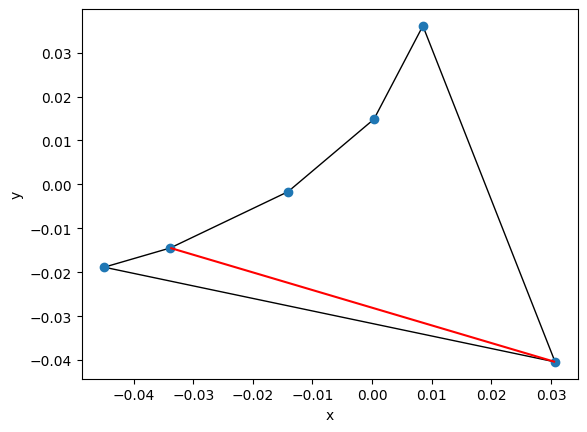

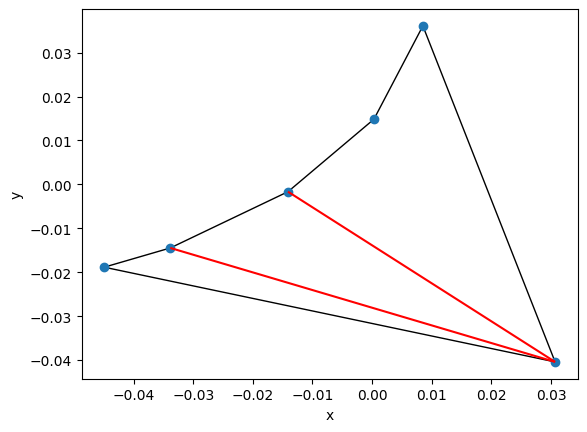

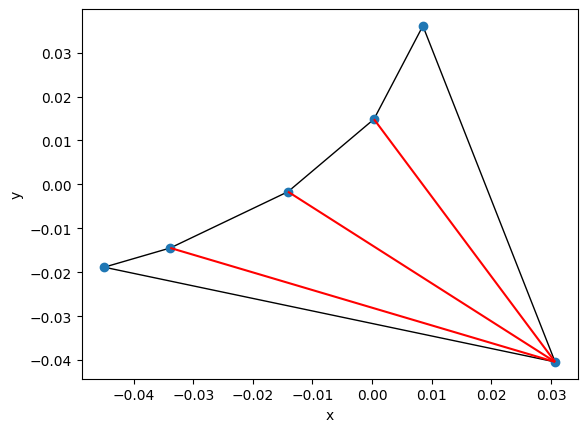

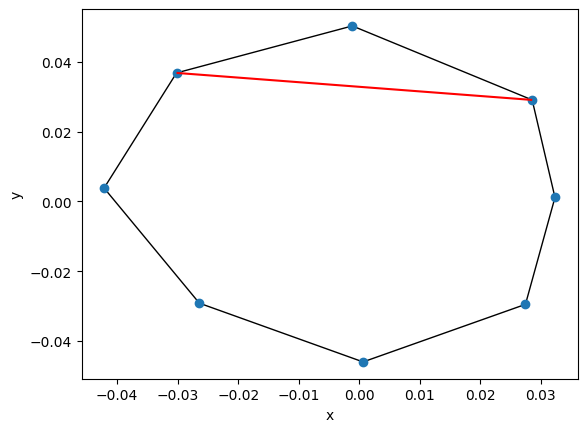

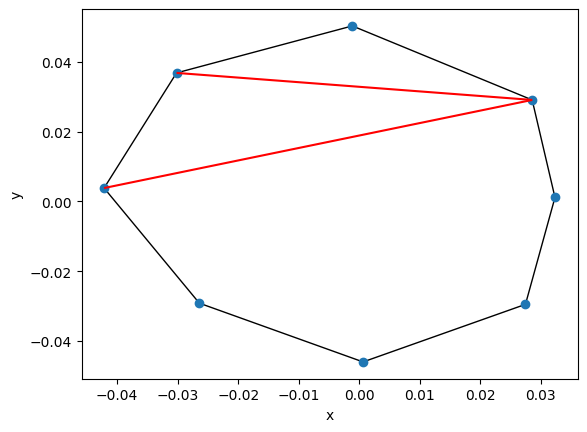

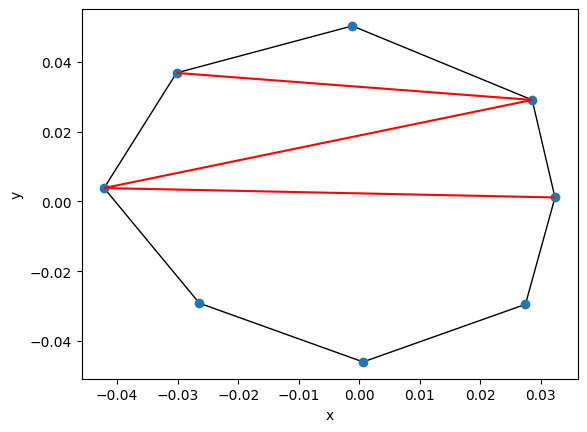

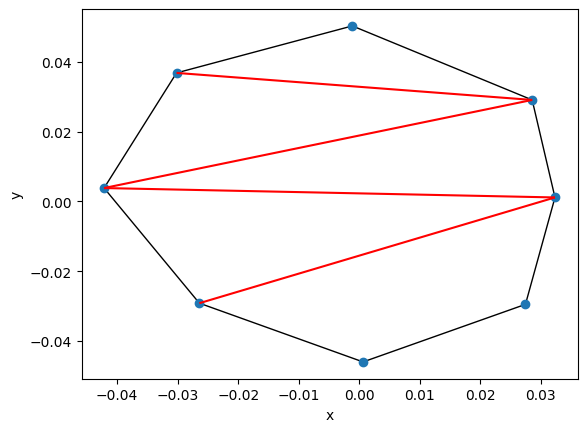

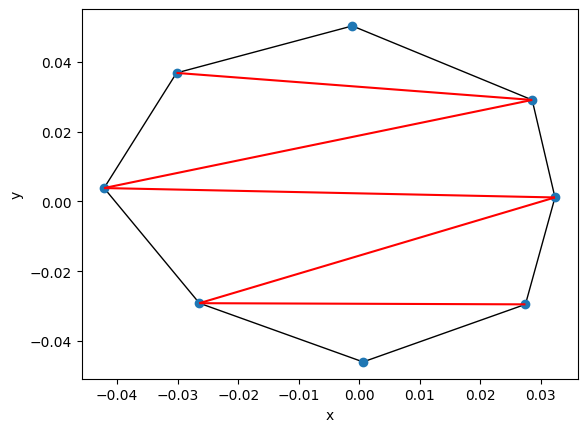

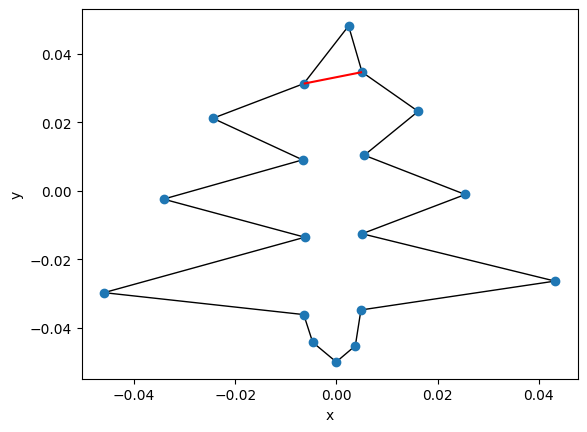

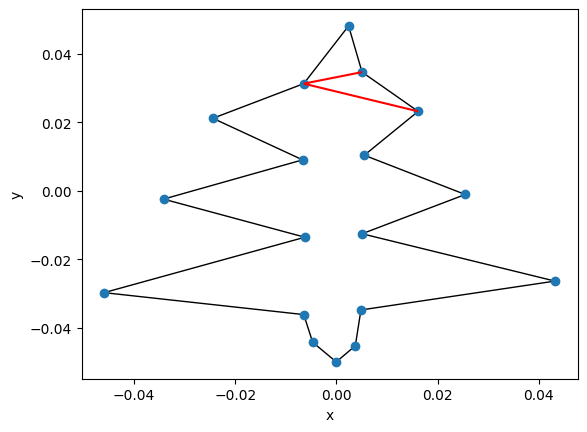

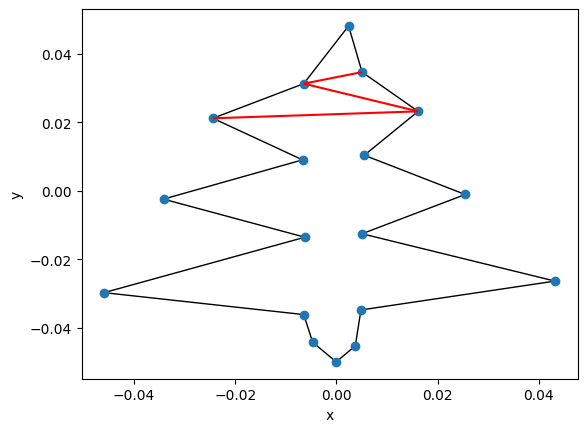

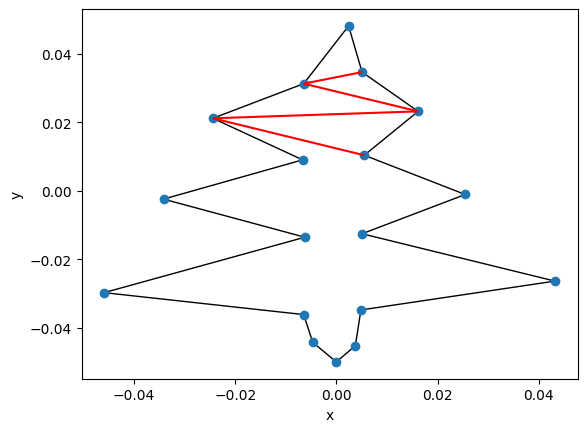

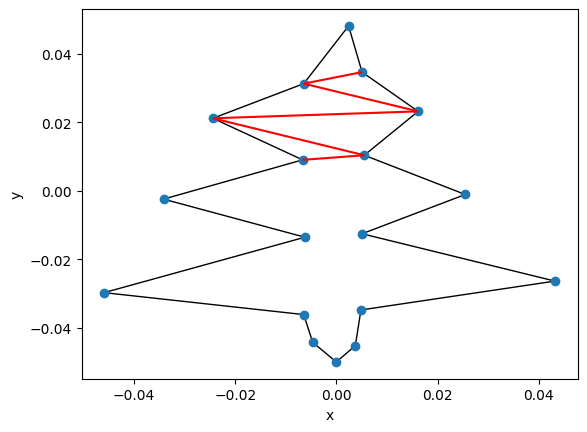

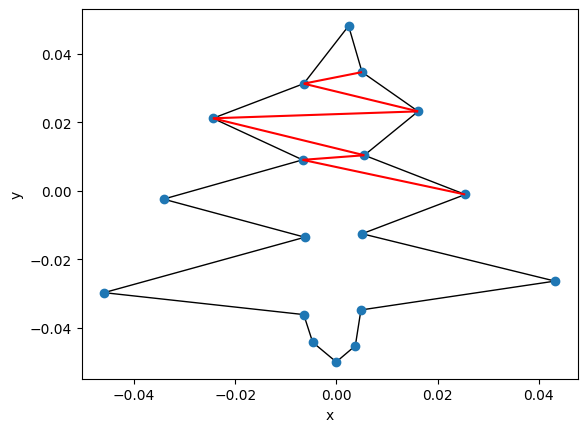

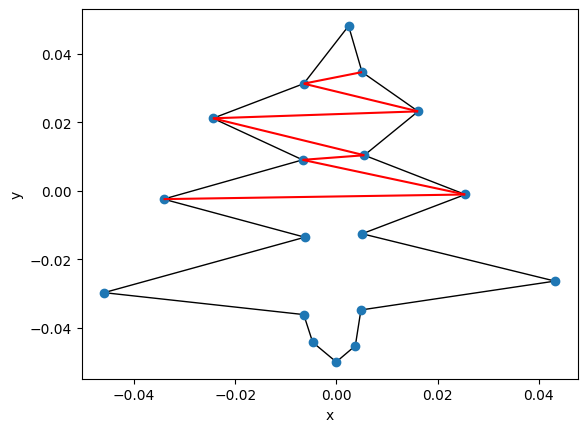

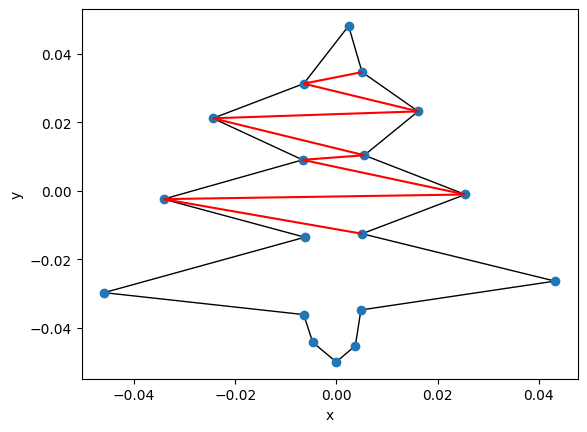

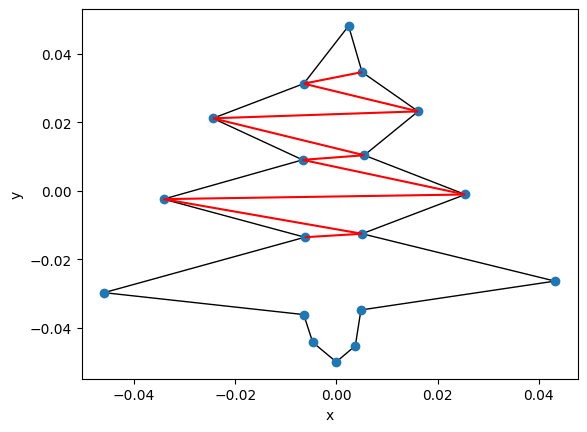

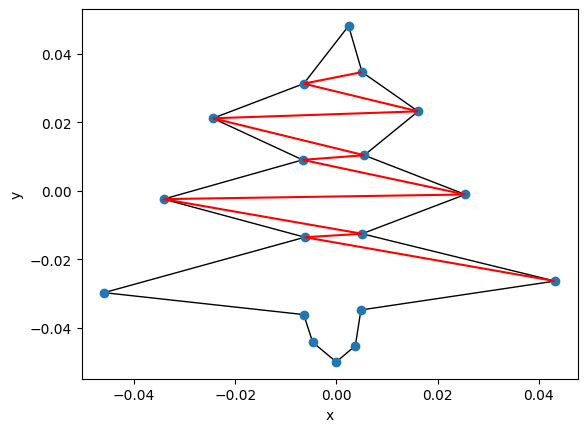

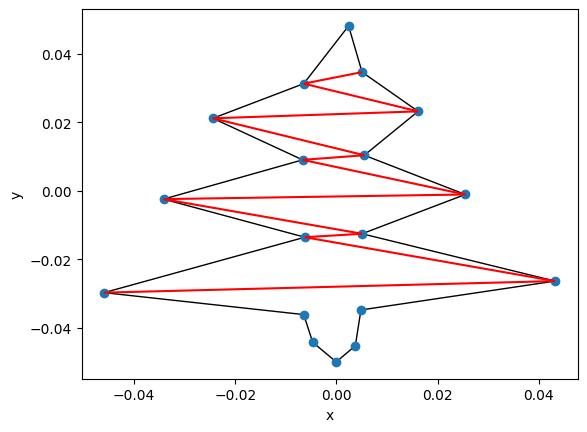

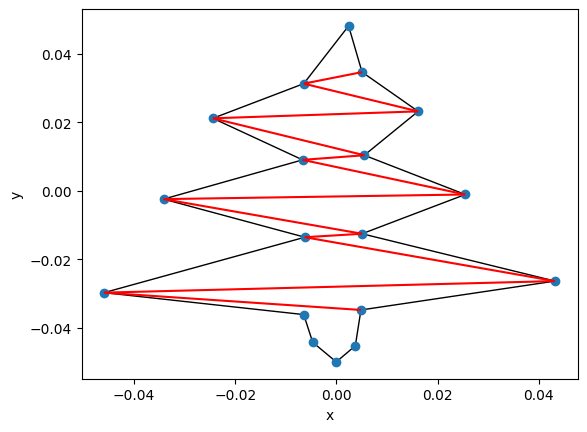

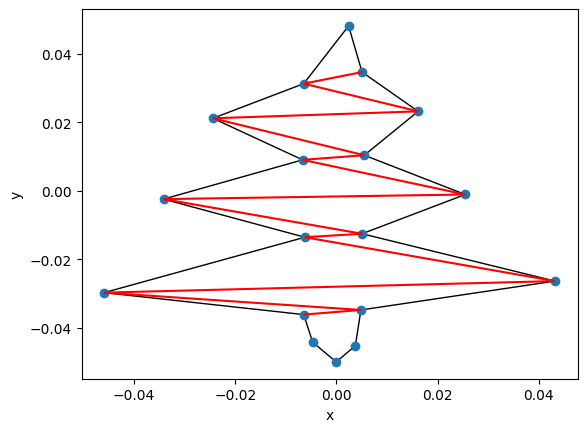

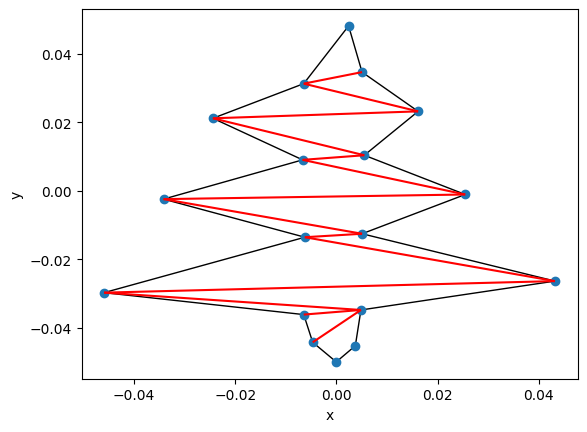

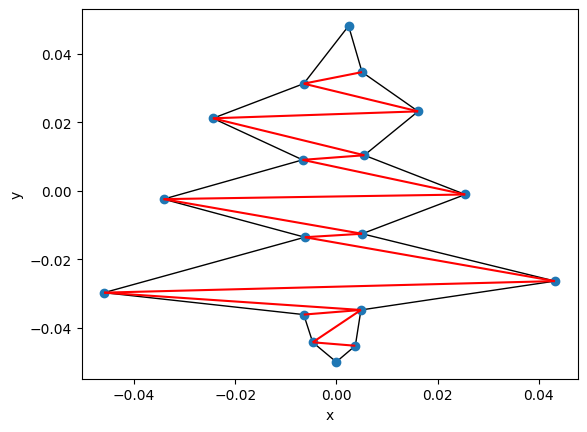

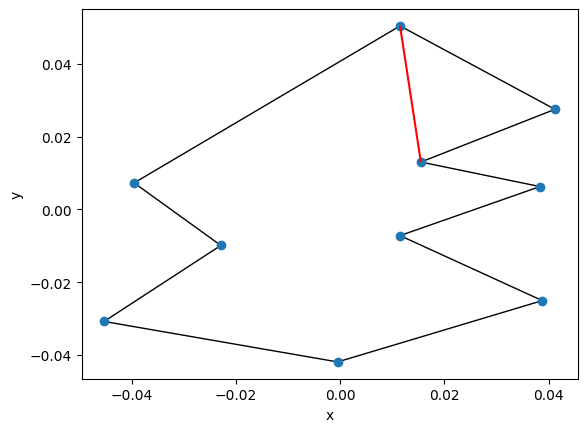

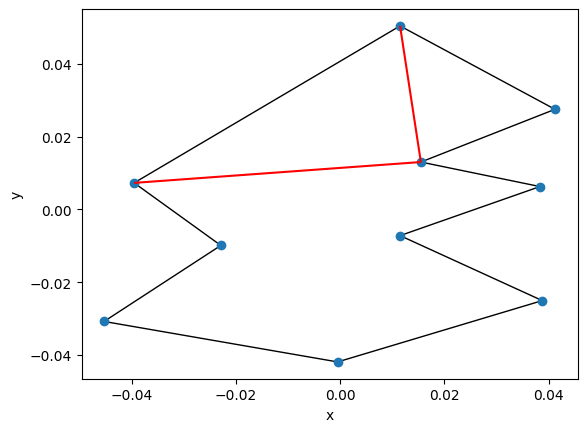

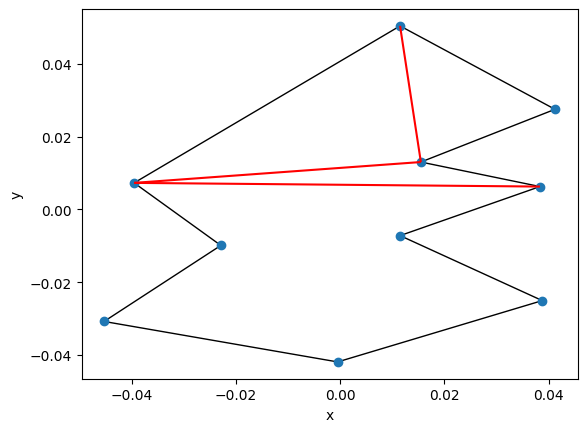

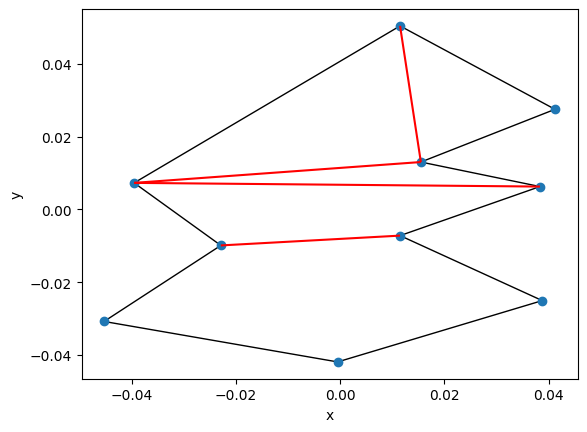

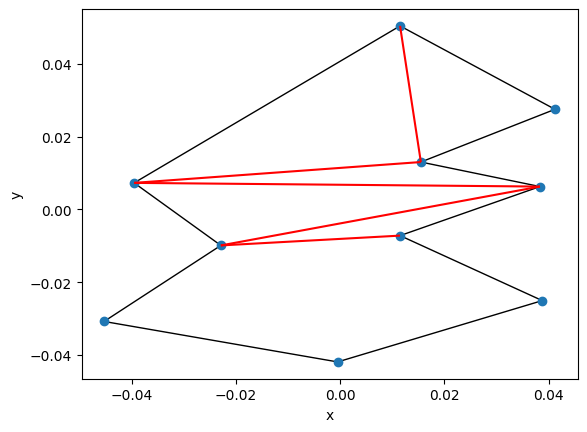

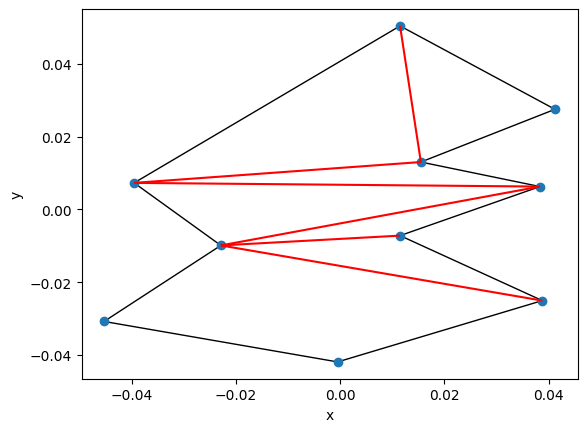

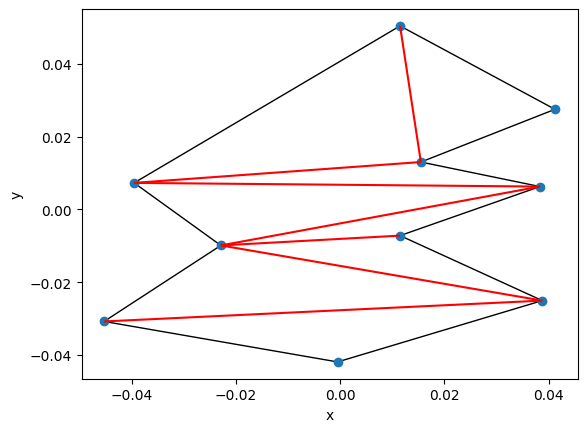

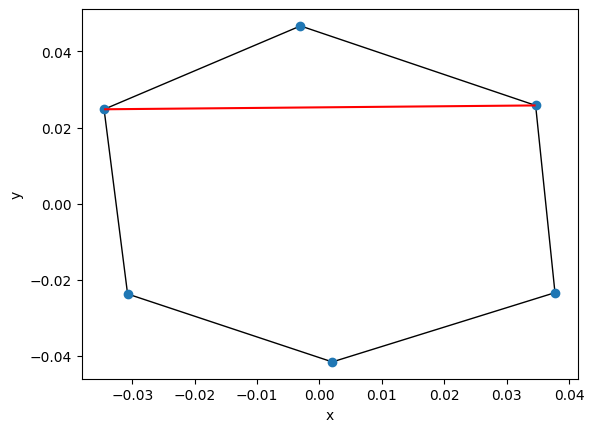

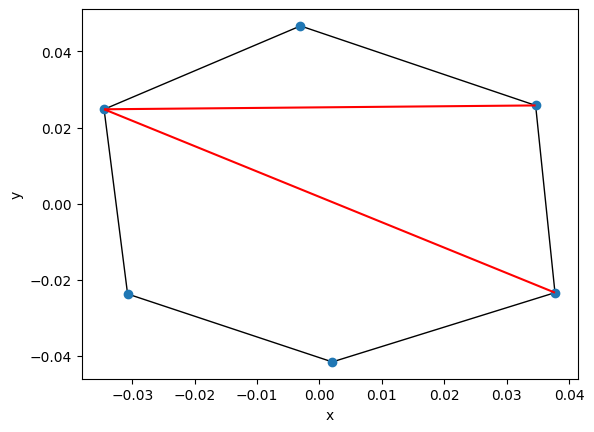

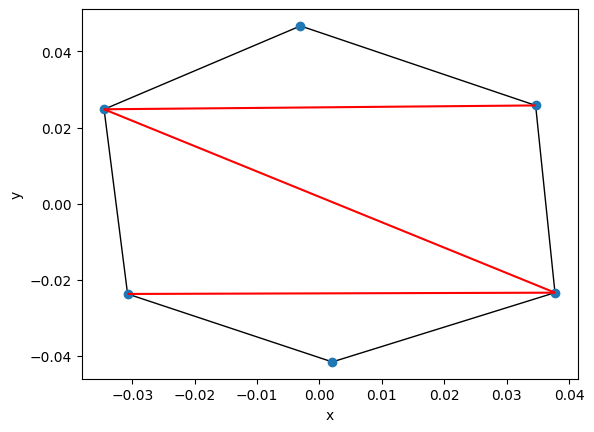

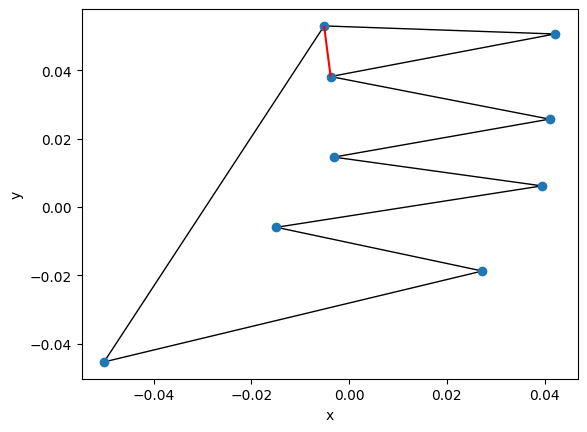

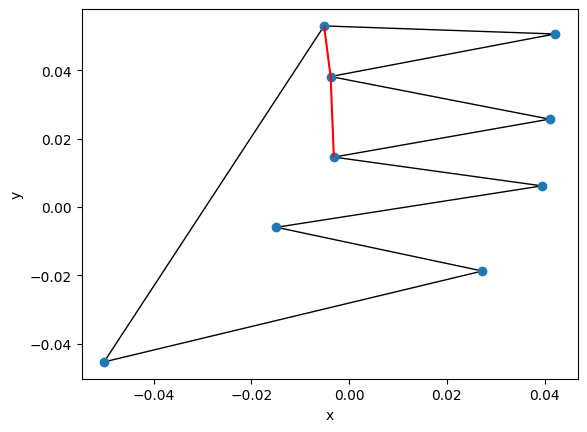

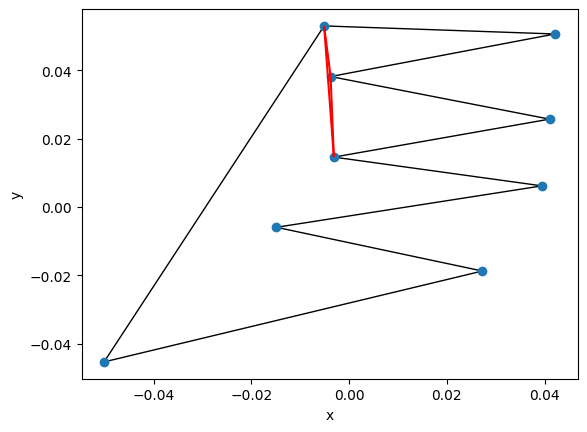

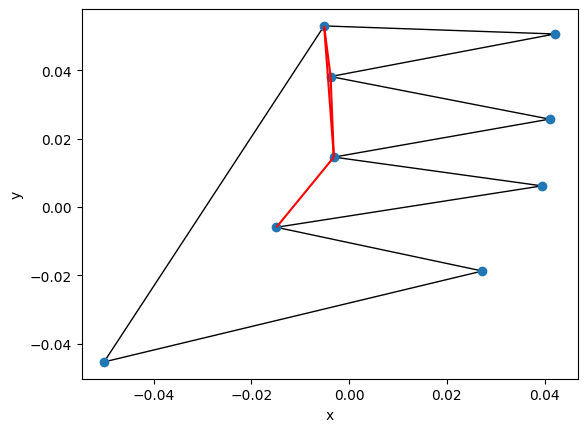

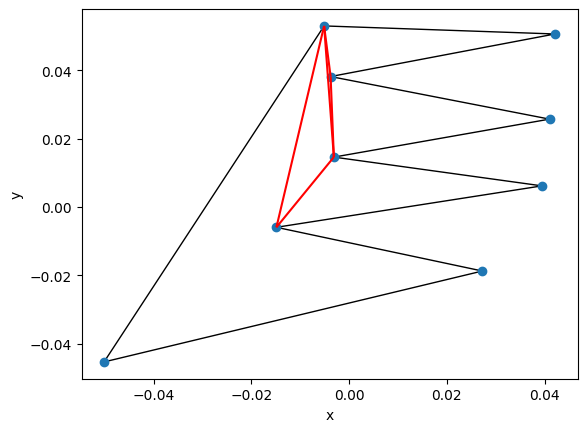

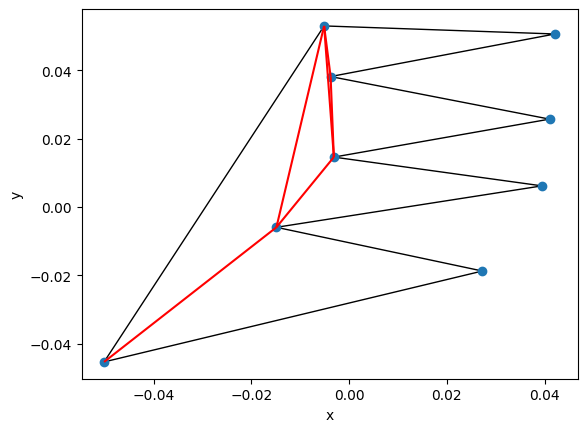

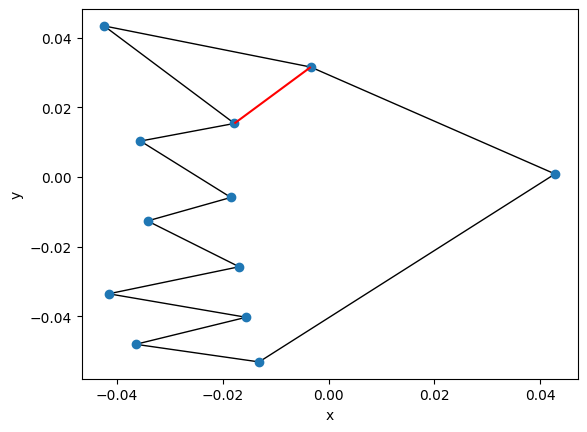

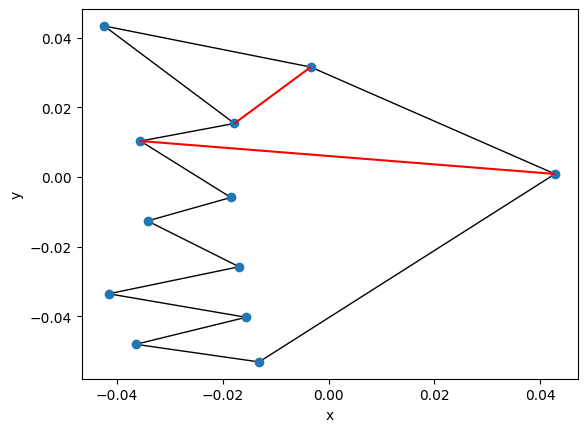

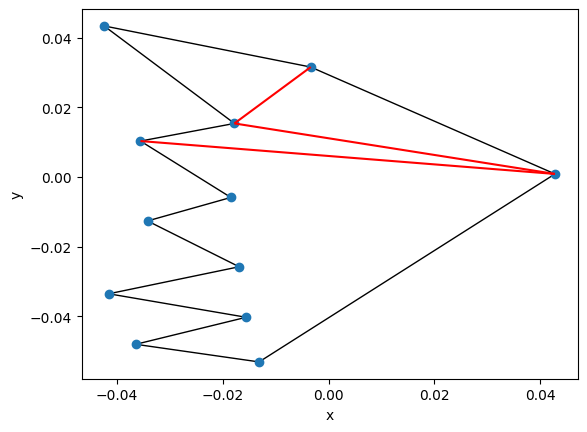

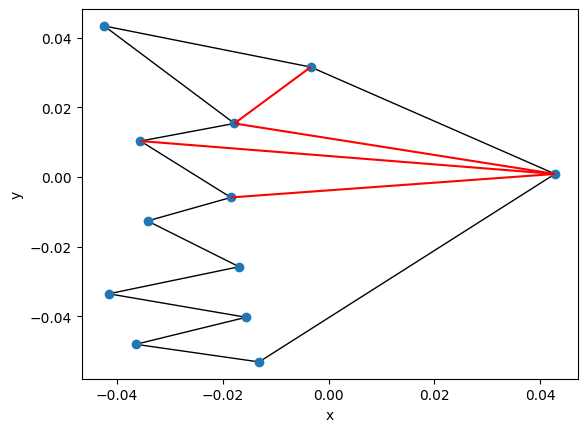

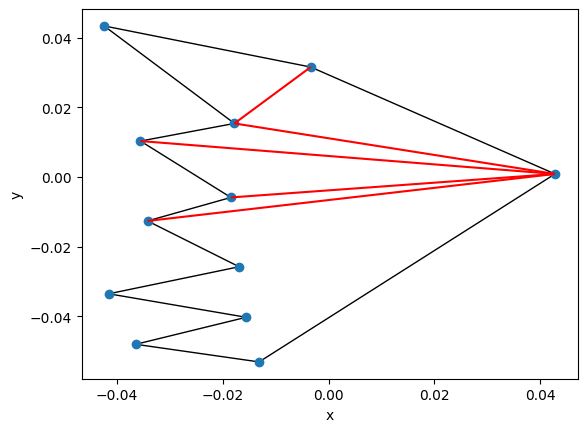

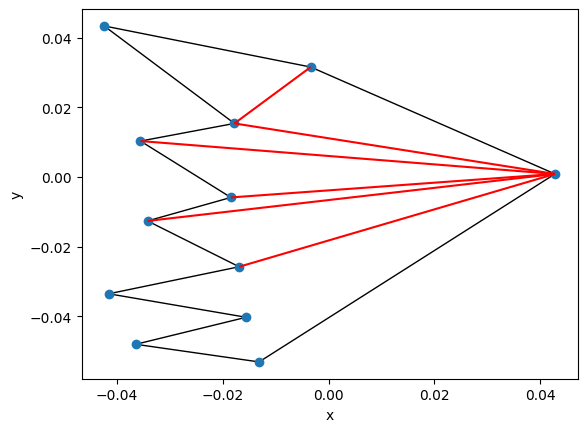

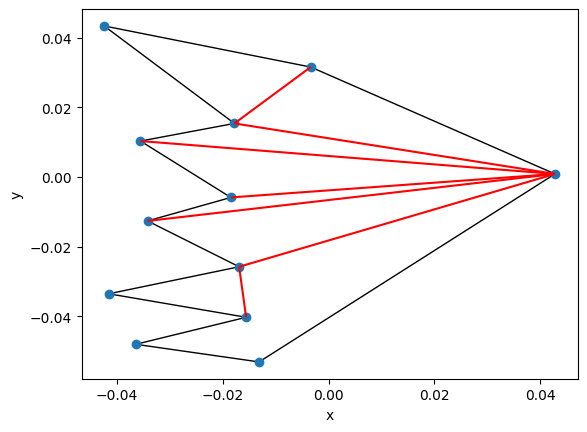

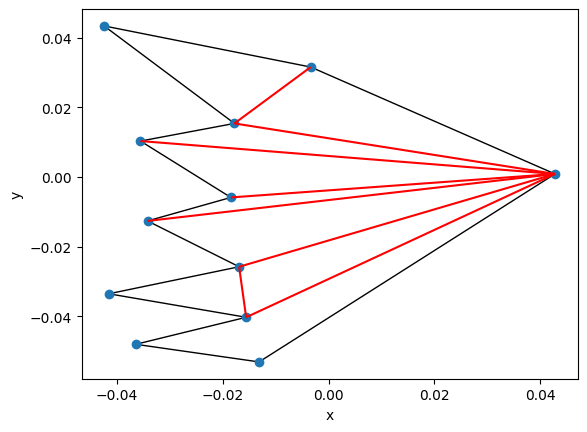

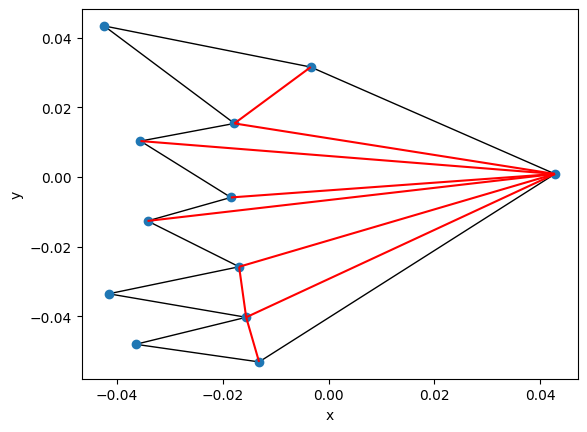

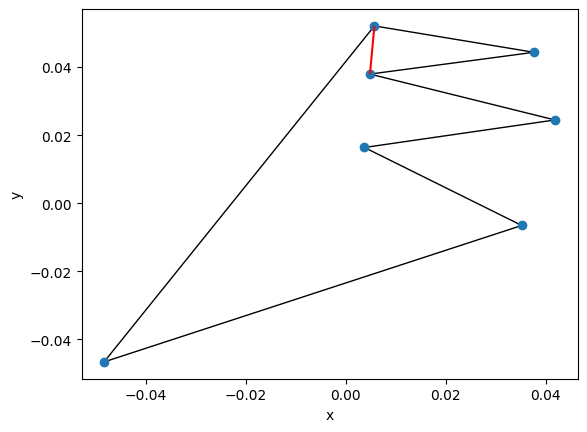

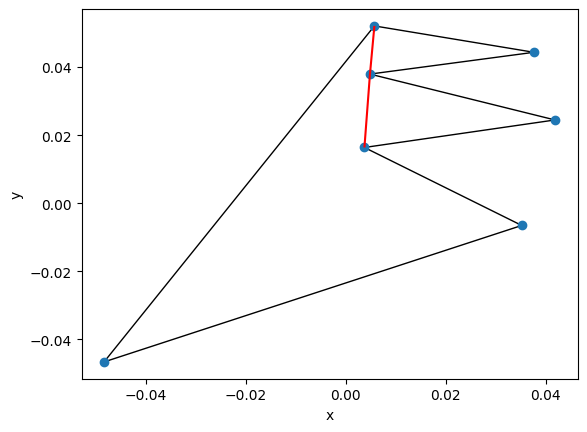

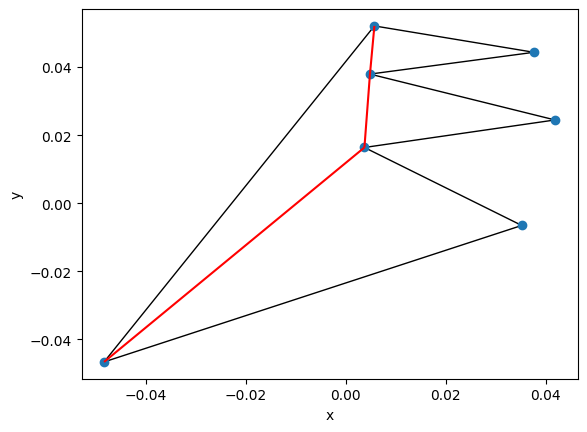

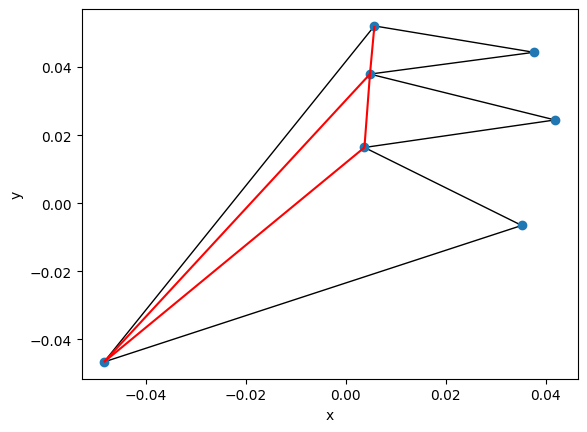

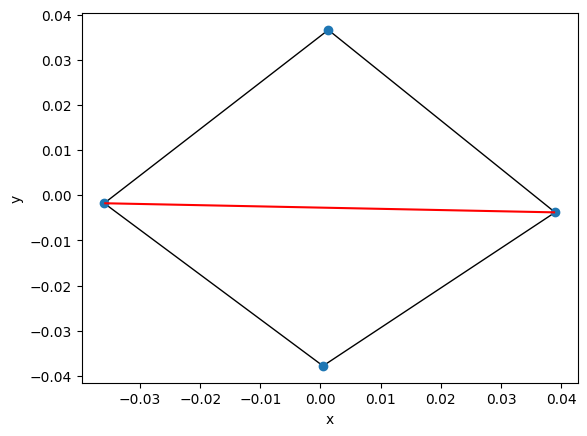

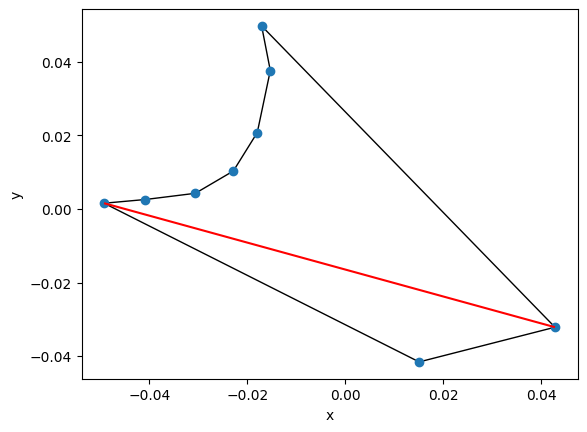

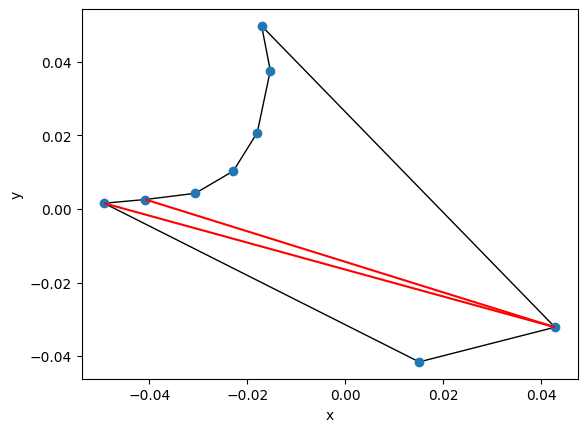

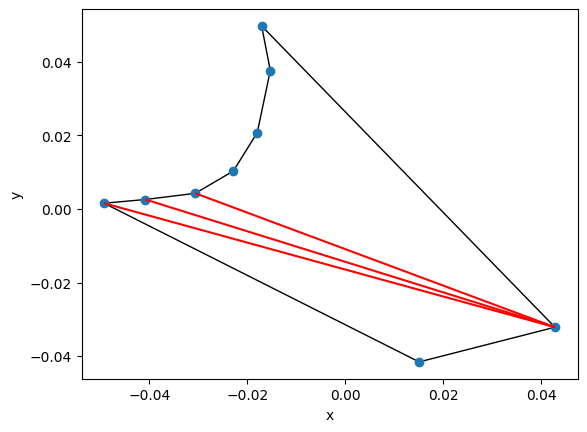

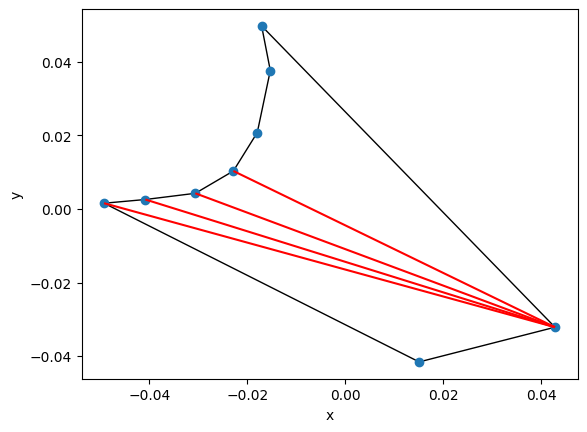

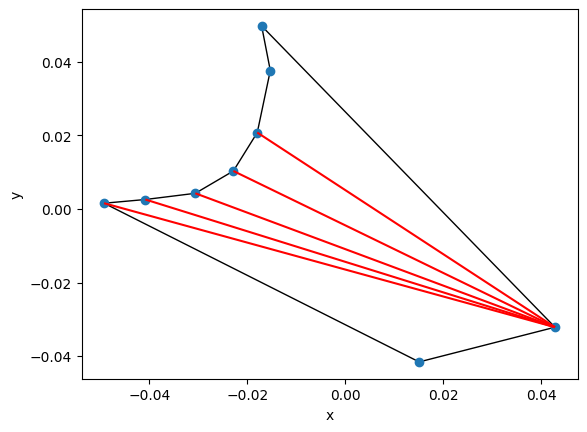

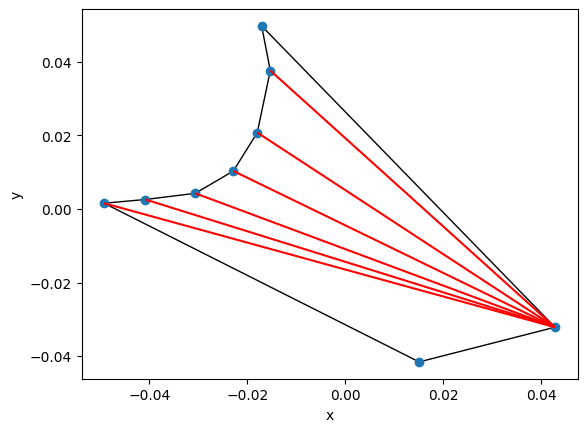

In [165]:

test_cases = [[(0.030693547033494514, -0.0404187105216232), (0.008516127678655797, 0.0360825149685729), (0.0003104825173654846, 0.014850897321514067), (-0.01410484006327968, -0.0016625830706427924), (-0.03384274328908614, -0.01446895561966241), (-0.04493145296650549, -0.0188500830706428)], [(-0.0011310497406990389, 0.05034364616169651), (-0.03018346909553775, 0.03686325400483377), (-0.042159275547150654, 0.0038362932205200373), (-0.02641330780521517, -0.029190667563793703), (0.0006431438076880541, -0.046041157759872144), (0.027477821227042898, -0.029527677367715277), (0.03235685348510742, 0.001140214789147484), (0.028586692194784838, 0.02911202851463769)], [(0.002417337356075161, 0.04811376394010061), (-0.006453630385860332, 0.03126327374402216), (-0.024417340063279683, 0.021152979626375107), (-0.006675404579408711, 0.009020626685198624), (-0.034175404579408715, -0.0024377066481347104), (-0.006231856192311938, -0.013559030177546477), (-0.045929436837473234, -0.029735500765781776), (-0.006453630385860332, -0.036138687040291585), (-0.004679436837473225, -0.04422692233440923), (-2.2178772957098802e-05, -0.0499560890010759), (0.0037479825173654807, -0.04523795174617394), (0.004856853485107421, -0.03479064782460531), (0.04322378896897838, -0.026365402726566088), (0.0050786276786558004, -0.012548000765781775), (0.02548185348510741, -0.0010896674324484407), (0.005522176065752574, 0.010368665900884907), (0.01616733735607516, 0.02317503844990451), (0.0050786276786558004, 0.034633371783237846)], [(0.03877999059615596, -0.025073528383292402), (0.011501764789704341, -0.007212008775449252), (0.038336442209059185, 0.0062683833814135), (0.015493700273575314, 0.013008579459844863), (0.04121950672518822, 0.027500001028472332), (0.011501764789704341, 0.050416667695139), (-0.039506299726424686, 0.007279412793178203), (-0.022873235210295655, -0.009908087206821806), (-0.04527242875868275, -0.03080269504995907), (-0.00047404166190855024, -0.041924018579370836)], [(-0.003046627044677744, 0.04670955985200173), (-0.034538562528548714, 0.02480392259709978), (-0.030768401238226127, -0.023725489167606126), (0.0020541794069351693, -0.04158700877544927), (0.03775982456822549, -0.02338847936368456), (0.034654985858548065, 0.02581495200886448)], [(0.027247732531639826, -0.0187377430410946), (-0.014889364242553715, -0.005931370492074997), (0.039445313176801125, 0.006200982449101486), (-0.0031353319844892036, 0.0146262275471407), (0.04099773253163984, 0.025747551076552466), (-0.0038006545651343565, 0.03821691382165052), (0.042106603499381764, 0.05068627656674857), (-0.00513129972642469, 0.05304534519419954), (-0.050151461016747265, -0.04536151755089854)], [(0.04277192608002693, 0.0008762265186683937), (-0.0033571061780375833, 0.031544118675531155), (-0.04238936424255372, 0.043339461812786056), (-0.01777242875868275, 0.015367648087295849), (-0.03551436424255372, 0.010312501028472323), (-0.018437751339327915, -0.005863969559762983), (-0.0341837190812634, -0.012604165638194359), (-0.016885331984489202, -0.025747547991135537), (-0.04150226746836017, -0.033498773481331616), (-0.015554686823198882, -0.04023896955976299), (-0.036401461016747266, -0.04799019504995907), (-0.013115170694166622, -0.0530453421087826)], [(0.03523160349938177, -0.0065379891676061175), (0.0037396680155108025, 0.01637867749906055), (0.041884829305833385, 0.02446691279317821), (0.004848538983252729, 0.03794730495004095), (0.03767111962841403, 0.04435049122455076), (0.005735635757446289, 0.05210171671474684), (-0.04837726746836017, -0.0466421558342728)], [(0.00041305511228499625, -0.0378125), (0.03900176478970435, -0.0037745098039215635), (0.0013001518864785427, 0.036666666666666695), (-0.03595791262965049, -0.001752450980392145)], [(0.04277192608002693, -0.032150734265645346), (-0.01710710617803759, 0.049742648087295865), (-0.015332912629650496, 0.03761029514611938), (-0.017994202952231135, 0.020759804950040955), (-0.022873235210295655, 0.010312501028472323), (-0.0306353319844892, 0.004246324557884082), (-0.04083694488771501, 0.002561275538276231), (-0.04926436424255372, 0.0015502461265115286), (0.015050151886478541, -0.04158700877544927)]]
vis = []
for p in test_cases:
    if is_y_monotonic(p):
        triangulation_vis(p)

